In [ ]:
!python --version

Python 3.6.9


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
gun_violence = pd.read_csv('/content/drive/My Drive/SSI Research/datasets/gun-violence-data_01-2013_03-2018.csv')
display(gun_violence)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,14.0,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,NaN,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,43.0,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,NaN,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,Cotton Club,-82.1377,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,6.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,NaN,-104.8020,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,NaN,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,NaN,0::Unknown,0::Unknown,Shots Fired - No Injuries,NaN,NaN,NaN,1.0,NaN,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Susp

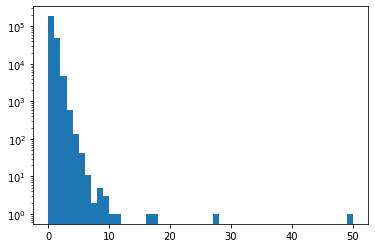

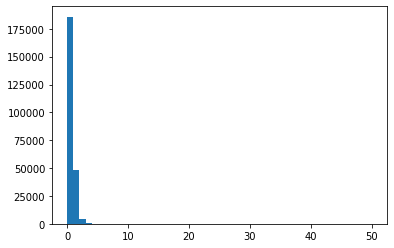

0.25228953967214207
50


239677

In [ ]:
plt.hist(gun_violence.n_killed, bins=50)
plt.yscale('log')
plt.show()
plt.hist(gun_violence.n_killed, bins=50)
plt.show()
print(gun_violence.n_killed.mean())
print(gun_violence.n_killed.max())
len(gun_violence.n_killed)

In [ ]:
!pip install plotly-geo
!pip install geopandas
!pip install pyshp
!pip install shapely
!pip install us
!pip install census
!pip install plotly-orca
!pip install plotly
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

     |████████████████████████████████| 23.7MB 153kB/s 
     |████████████████████████████████| 972kB 2.6MB/s 
     |████████████████████████████████| 14.7MB 314kB/s 
     |████████████████████████████████| 10.9MB 43.2MB/s 
     |████████████████████████████████| 225kB 2.6MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=e04887f66194a33ce37072463e1b2b6da475e88421aaaa0ea75b8bd6eb479d57
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built pyshp
     |████████████████████████████████| 133kB 4.0MB/s 
  Created wheel for us: filename=us-2.0.2-cp36-none-any.whl size=11927 sha256=cc233284e325ffe729b4817a5e1d78932f58ecf4024ab03d1798db39ebee4307
  Stored in directory: /root/.cache/pip/wheels/e2/16/45/6453383ffa495670f0f6b80a3e697a9771d98cfbaf8b451e73
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp36-cp36m-linux_x86_64.whl size=74760 sha256=4ab701d18379c2d3845fe91f2d0cecc81

In [ ]:
import us

map = us.states.mapping('name', 'abbr')
keys = map.keys()
print(map.keys())

state_sep_df = gun_violence.groupby(['state']).sum()
state_sep_df.head()

dict_keys(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'American Samoa', 'Guam', 'Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands', 'District of Columbia', 'Dakota', 'Orleans', 'Philippine Islands'])


,incident_id,n_killed,n_injured,incident_url_fields_missing,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
state,,,,,,,,,,
Alabama,3054587926,1880,2998,False,23664.0,177234.0741,-4.665857e+05,3720.0,308587.0,102039.0
Alaska,780845962,267,325,False,1157.0,79704.3974,-1.921305e+05,1188.0,22033.0,129.0
Arizona,1294858147,1094,1096,False,12294.0,75695.8016,-2.542293e+05,1807.0,41325.0,41325.0
Arkansas,1666696915,773,1347,False,5976.0,96446.4220,-2.539776e+05,2116.0,117324.0,63174.0
California,9314905580,5562,7644,False,356459.0,577560.4412,-1.917836e+06,16969.0,532962.0,267744.0


In [ ]:
import plotly.express as px

fig = px.choropleth(locations=state_sep_df.index.map(map),
                    locationmode="USA-states", 
                    color=state_sep_df['n_killed'] + state_sep_df['n_injured'],
                    scope="usa",
                    title='Gun Violence in the USA (n_injured + n_killed)')
fig.update_layout(title_x=0.5)
fig.write_image('/content/drive/My Drive/SSI Research/output/gvusa_raw.svg')
fig.show()

In [ ]:
state_pop_by_month_df = pd.read_csv('/content/drive/My Drive/SSI Research/datasets/statepopulationbymonth.csv')
display(state_pop_by_month_df.head())

state_pop_by_month_df = state_pop_by_month_df.loc[state_pop_by_month_df['NAME'].isin(keys), :]
display(state_pop_by_month_df.head())
# state_pop_adj_df = gun_violence.groupby(['state']).sum() / gun_violence.groupby(['state'])

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,NPOPCHG_2017,NPOPCHG_2018,NPOPCHG_2019,PPOPCHG_2010,PPOPCHG_2011,PPOPCHG_2012,PPOPCHG_2013,PPOPCHG_2014,PPOPCHG_2015,PPOPCHG_2016,PPOPCHG_2017,PPOPCHG_2018,PPOPCHG_2019,NRANK_ESTBASE2010,NRANK_POPEST2010,NRANK_POPEST2011,NRANK_POPEST2012,NRANK_POPEST2013,NRANK_POPEST2014,NRANK_POPEST2015,NRANK_POPEST2016,NRANK_POPEST2017,NRANK_POPEST2018,NRANK_POPEST2019,NRANK_NPCHG2010,NRANK_NPCHG2011,NRANK_NPCHG2012,NRANK_NPCHG2013,NRANK_NPCHG2014,NRANK_NPCHG2015,NRANK_NPCHG2016,NRANK_NPCHG2017,NRANK_NPCHG2018,NRANK_NPCHG2019,NRANK_PPCHG2010,NRANK_PPCHG2011,NRANK_PPCHG2012,NRANK_PPCHG2013,NRANK_PPCHG2014,NRANK_PPCHG2015,NRANK_PPCHG2016,NRANK_PPCHG2017,NRANK_PPCHG2018,NRANK_PPCHG2019
0,10,0,0,0,United States,308758105,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523,563561,2235208,2274116,2162725,2307293,2334155,2306148,2044228,1701962,1552022,0.182525,0.722616,0.729920,0.689137,0.730171,0.733317,0.719244,0.633003,0.523704,0.475078,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X
1,20,1,0,0,Northeast Region,55318443,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803,61691,224089,170993,126590,104205,28673,7646,16910,-12620,-63817,0.111520,0.404638,0.307518,0.226965,0.186407,0.051196,0.013645,0.030174,-0.022512,-0.113864,4,4,4,4,4,4,4,4,4,4,4,3,3,4,4,4,4,4,4,4,4,3,3,3,4,4,4,4,4,4,4
2,20,2,0,0,Midwest Region,66929725,66974416,67157800,67336743,67560379,67745167,67860583,67987540,68126781,68236628,68329004,44691,183384,178943,223636,184788,115416,126957,139241,109847,92376,0.066773,0.273812,0.266452,0.332116,0.273515,0.170368,0.187085,0.204804,0.161239,0.135376,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,3,3,3,3,3,3,4,4,4,3,3,3,3,3,3,3
3,20,3,0,0,South Region,114563030,114866680,116006522,117241208,118364400,119624037,120997341,122351760,123542189,124569433,125580448,303650,1139842,1234686,1123192,1259637,1373304,1354419,1190429,1027244,1011015,0.265051,0.992317,1.064325,0.958018,1.064203,1.148017,1.119379,0.972956,0.831492,0.811608,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,20,4,0,0,West Region,71946907,72100436,72788329,73477823,74167130,74925793,75742555,76559681,77257329,77834820,78347268,153529,687893,689494,689307,758663,816762,817126,697648,577491,512448,0.213392,0.954076,0.947259,0.938116,1.022910,1.090095,1.078820,0.911247,0.747490,0.658379,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,NPOPCHG_2017,NPOPCHG_2018,NPOPCHG_2019,PPOPCHG_2010,PPOPCHG_2011,PPOPCHG_2012,PPOPCHG_2013,PPOPCHG_2014,PPOPCHG_2015,PPOPCHG_2016,PPOPCHG_2017,PPOPCHG_2018,PPOPCHG_2019,NRANK_ESTBASE2010,NRANK_POPEST2010,NRANK_POPEST2011,NRANK_POPEST2012,NRANK_POPEST2013,NRANK_POPEST2014,NRANK_POPEST2015,NRANK_POPEST2016,NRANK_POPEST2017,NRANK_POPEST2018,NRANK_POPEST2019,NRANK_NPCHG2010,NRANK_NPCHG2011,NRANK_NPCHG2012,NRANK_NPCHG2013,NRANK_NPCHG2014,NRANK_NPCHG2015,NRANK_NPCHG2016,NRANK_NPCHG2017,NRANK_NPCHG2018,NRANK_NPCHG2019,NRANK_PPCHG2010,NRANK_PPCHG2011,NRANK_PPCHG2012,NRANK_PPCHG2013,NRANK_PPCHG2014,NRANK_PPCHG2015,NRANK_PPCHG2016,NRANK_PPCHG2017,NRANK_PPCHG2018,NRANK_PPCHG2019
5,40,3,6,1,Alabama,4780125,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185,5312,13632,16519,14493,11718,10548,11178,10961,13195,15504,0.111127,0.284864,0.344213,0.300960,0.242605,0.217853,0.230363,0.225372,0.270695,0.317206,23,23,23,23,23,23,24,24,24,24,24,28,32,25,31,32,30,29,28,23,20,37,38,34,33,35,36,34,33,28,26
6,40,4,9,2,Alaska,710249,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545,3661,8218,8315,6625,-785,1215,3958,-1756,-4561,-3594,0.515453,1.151125,1.151458,0.906984,-0.106503,0.165018,0.536679,-0.236831,-0.616601,-0.488887,47,47,47,47,47,48,48,48,48,48,48,32,39,40,42,47,42,37,43,46,43,2,7,11,18,48,37,22,48,50,50
7,40,4,8,4,Arizona,6392288,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717,14884,65471,82335,77786,97649,99263,111396,102936,114016,120693,0.232843,1.021839,1.272046,1.186671,1.472222,1.474843,1.631058,1.482999,1.618624,1.686122,16,16,16,15,15,15,14,14,14,14,14,11,10,7,5,4,7,7,7,3,3,17,10,8,7,7,9,7,6,4,3
8,40,3,7,5,Arkansas,2916031,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804,5933,18703,11497,7236,7992,10656,11870,11427,8388,8071,0.203461,0.640083,0.390966,0.245108,0.270055,0.359103,0.398583,0.382184,0.279475,0.268163,32,32,32,32,32,32,33,32,32,33,33,26,25,35,41,36,29,27,27,30,28,22,28,31,38,31,30,26,24,27,27
9,40,4,9,6,California,37254519,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223,64983,318867,310431,311987,336185,321073,249072,191380,103091,50635,0.174430,0.854425,0.824773,0.822126,0.878667,0.831861,0.639991,0.488624,0.261928,0.128315,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,3,3,3,5,12,27,18,20,21,16,17,20,22,29,36


In [ ]:
combined_df = pd.merge(state_sep_df, state_pop_by_month_df, left_on=['state'], right_on= ['NAME'], how = 'left')
display(combined_df.head())
fig = px.choropleth(locations=combined_df['NAME'].map(map), 
                    locationmode="USA-states", 
                    color=((combined_df['n_killed'] + combined_df['n_injured']) / combined_df['ESTIMATESBASE2010']), 
                    scope="usa", range_color=[150e-6, 0.0015],
                    title='Gun Violence in the USA (n_injured + n_killed) / population')
fig.update_layout(title_x=0.5)
fig.write_image('/content/drive/My Drive/SSI Research/output/gvusa_adjusted.svg')
fig.show()

,incident_id,n_killed,n_injured,incident_url_fields_missing,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,NPOPCHG_2017,NPOPCHG_2018,NPOPCHG_2019,PPOPCHG_2010,PPOPCHG_2011,PPOPCHG_2012,PPOPCHG_2013,PPOPCHG_2014,PPOPCHG_2015,PPOPCHG_2016,PPOPCHG_2017,PPOPCHG_2018,PPOPCHG_2019,NRANK_ESTBASE2010,NRANK_POPEST2010,NRANK_POPEST2011,NRANK_POPEST2012,NRANK_POPEST2013,NRANK_POPEST2014,NRANK_POPEST2015,NRANK_POPEST2016,NRANK_POPEST2017,NRANK_POPEST2018,NRANK_POPEST2019,NRANK_NPCHG2010,NRANK_NPCHG2011,NRANK_NPCHG2012,NRANK_NPCHG2013,NRANK_NPCHG2014,NRANK_NPCHG2015,NRANK_NPCHG2016,NRANK_NPCHG2017,NRANK_NPCHG2018,NRANK_NPCHG2019,NRANK_PPCHG2010,NRANK_PPCHG2011,NRANK_PPCHG2012,NRANK_PPCHG2013,NRANK_PPCHG2014,NRANK_PPCHG2015,NRANK_PPCHG2016,NRANK_PPCHG2017,NRANK_PPCHG2018,NRANK_PPCHG2019
0,3054587926,1880,2998,False,23664.0,177234.0741,-4.665857e+05,3720.0,308587.0,102039.0,40,3,6,1,Alabama,4780125,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185,5312,13632,16519,14493,11718,10548,11178,10961,13195,15504,0.111127,0.284864,0.344213,0.300960,0.242605,0.217853,0.230363,0.225372,0.270695,0.317206,23,23,23,23,23,23,24,24,24,24,24,28,32,25,31,32,30,29,28,23,20,37,38,34,33,35,36,34,33,28,26
1,780845962,267,325,False,1157.0,79704.3974,-1.921305e+05,1188.0,22033.0,129.0,40,4,9,2,Alaska,710249,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545,3661,8218,8315,6625,-785,1215,3958,-1756,-4561,-3594,0.515453,1.151125,1.151458,0.906984,-0.106503,0.165018,0.536679,-0.236831,-0.616601,-0.488887,47,47,47,47,47,48,48,48,48,48,48,32,39,40,42,47,42,37,43,46,43,2,7,11,18,48,37,22,48,50,50
2,1294858147,1094,1096,False,12294.0,75695.8016,-2.542293e+05,1807.0,41325.0,41325.0,40,4,8,4,Arizona,6392288,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717,14884,65471,82335,77786,97649,99263,111396,102936,114016,120693,0.232843,1.021839,1.272046,1.186671,1.472222,1.474843,1.631058,1.482999,1.618624,1.686122,16,16,16,15,15,15,14,14,14,14,14,11,10,7,5,4,7,7,7,3,3,17,10,8,7,7,9,7,6,4,3
3,1666696915,773,1347,False,5976.0,96446.4220,-2.539776e+05,2116.0,117324.0,63174.0,40,3,7,5,Arkansas,2916031,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804,5933,18703,11497,7236,7992,10656,11870,11427,8388,8071,0.203461,0.640083,0.390966,0.245108,0.270055,0.359103,0.398583,0.382184,0.279475,0.268163,32,32,32,32,32,32,33,32,32,33,33,26,25,35,41,36,29,27,27,30,28,22,28,31,38,31,30,26,24,27,27
4,9314905580,5562,7644,False,356459.0,577560.4412,-1.917836e+06,16969.0,532962.0,267744.0,40,4,9,6,California,37254519,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223,64983,318867,310431,311987,336185,321073,249072,191380,103091,50635,0.174430,0.854425,0.824773,0.822126,0.878667,0.831861,0.639991,0.488624,0.261928,0.128315,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,3,3,3,5,12,27,18,20,21,16,17,20,22,29,36


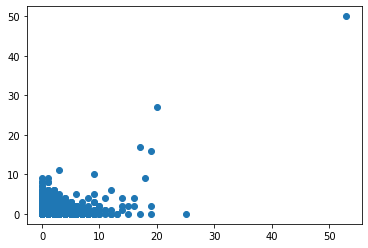

In [ ]:
plt.scatter(gun_violence['n_injured'], gun_violence['n_killed'])
plt.show()

In [ ]:
fips = gun_violence['city_or_county']
display(fips)

0           Mckeesport
1            Hawthorne
2               Lorain
3               Aurora
4           Greensboro
              ...     
239672           Rayne
239673    Natchitoches
239674          Gretna
239675         Houston
239676    Norridgewock
Name: city_or_county, Length: 239677, dtype: object